# Análisis 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,5.)})
sns.set_style("whitegrid")
palette = sns.set_palette ('mako')

In [5]:
path = 'C:/Users/manya/Documents/Ironhack/Course/Project-1/data/attacks-limpio.csv'
df = pd.read_csv (path, encoding="cp1252")

In [6]:
df

,case_number,year,country,activity,sex,fatal,fatal_numerica,month,latitude,hemisphere,season
0,2018.06.25,2018.0,USA,paddling,F,N,0,6,37.090240,North,Summer
1,2018.06.18,2018.0,USA,NaN,F,N,0,6,37.090240,North,Summer
2,2018.06.09,2018.0,USA,surfing,M,N,0,6,37.090240,North,Summer
3,2018.06.08,2018.0,AUSTRALIA,surfing,M,N,0,6,-25.274398,South,Winter
4,2018.06.04,2018.0,MEXICO,diving,M,N,0,6,23.634501,North,Summer
...,...,...,...,...,...,...,...,...,...,...,...
4545,1753.10.27,1753.0,JAMAICA,NaN,M,Y,1,10,18.109581,North,Autumn
4546,1751.07.27,1751.0,USA,swimming,M,Y,1,7,37.090240,North,Summer
4547,1738.04.06,1738.0,ITALY,swimming,M,Y,1,4,41.871940,North,Spring
4548,1721.06.00,1721.0,ITALY,swimming,M,Y,1,6,41.871940,North,Summer


In [7]:
df.country.value_counts()

USA                        1943
AUSTRALIA                  1145
NEW ZEALAND                 106
BRAZIL                      102
BAHAMAS                      98
                           ... 
PALESTINIAN TERRITORIES       1
PUERTO RICO                   1
ARUBA                         1
MALDIVES                      1
GHANA                         1
Name: country, Length: 112, dtype: int64

Vemos que los 4 países donde hay más ataques de tiburones son USA, Australia, Brazil, Bahamas y Nueva Zelanda entre el 1900 y el 2018. El país donde más ataques de tiburones hay con mucha diferencia es USA con 1944, seguido por Australia con 1146 ataques. Con una ocurrencia mucho menor tenemos a Brazil, Bahamas y Nueva Zelanda con 102, 98 y 106 ataques respectivamente. Dada la diferencia entre el número de ataques de los dos primeros países y los 3 últimos, nos centramos en analizar Australia y USA ya que la muestra es más representativa.

## Hipótesis 1: ¿En qué país hay un porcentaje más elevado de muertes por ataques de tiburón?

1. Filtro el data frame para los dos países donde hay más ataques de tiburón. 

In [8]:
fatal_country = df.groupby('country')['fatal'].count() # Agrupo por país y cuento los ataques por cada país
fatal_country = fatal_country.sort_values (ascending = False) #Ordeno más a menos ataques
top2_country = fatal_country.head(2) #Cojo los 2 primeros países

print(top2_country.index) #top2 es una serie, cojo solo el indice que corresponde al país
df1 = df[df['country'].isin(top2_country.index)] #Filtro el data frame para solo tener las filas de los top 2b países
df1

Index(['USA', 'AUSTRALIA'], dtype='object', name='country')


,case_number,year,country,activity,sex,fatal,fatal_numerica,month,latitude,hemisphere,season
0,2018.06.25,2018.0,USA,paddling,F,N,0,6,37.090240,North,Summer
1,2018.06.18,2018.0,USA,NaN,F,N,0,6,37.090240,North,Summer
2,2018.06.09,2018.0,USA,surfing,M,N,0,6,37.090240,North,Summer
3,2018.06.08,2018.0,AUSTRALIA,surfing,M,N,0,6,-25.274398,South,Winter
5,2018.06.03,2018.0,AUSTRALIA,surfing,M,N,0,6,-25.274398,South,Winter
...,...,...,...,...,...,...,...,...,...,...,...
4535,1803.03.00,1803.0,AUSTRALIA,NaN,M,N,0,3,-25.274398,South,Autumn
4538,1788.05.10,1788.0,AUSTRALIA,fishing,NaN,N,0,5,-25.274398,South,Autumn
4543,1780.08.08,1780.0,USA,swimming,M,Y,1,8,37.090240,North,Summer
4544,1771.07.12,1771.0,USA,fishing,M,Y,1,7,37.090240,North,Summer


2. Creo un subdataframe donde obtendré los porcentajes de muertes y supervivientes 

In [9]:
#Hago un crosstab de country y fatal para tener la frecuencia de muertes y supervivientes para ambos países 
df_attacks = pd.crosstab(df1['country'],df1['fatal'], margins = True) # Añado margins = True para obtener el total

#Creo dos nuevas columnas que seran los porcentajes de muertes y supervivientes en cada uno de los países
df_attacks['death'] = df_attacks.apply(lambda x: (x['Y']/x['All']),axis=1)
df_attacks['survival'] = df_attacks.apply(lambda x: (x['N']/x['All']),axis=1)

df_attacks

fatal,N,Y,All,death,survival
country,,,,,
AUSTRALIA,882,263,1145,0.229694,0.770306
USA,1777,166,1943,0.085435,0.914565
All,2659,429,3088,0.138925,0.861075


3. Gráfico visualización: pie plot

In [10]:
# Creo dos listas que donde tendré los porcentajes de muertes y supervivientes para los dos países

In [11]:
Australia = [df_attacks.death[0], df_attacks.survival[0]]
USA = [df_attacks.death[1], df_attacks.survival[1]]

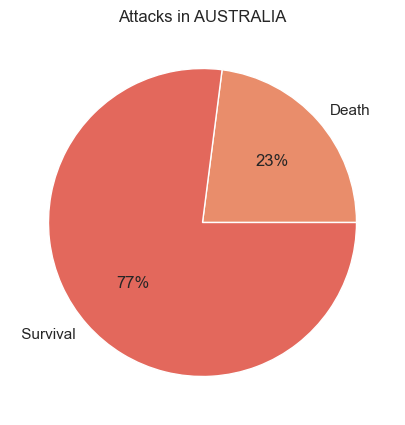

In [21]:
plotAUS= plt.pie (Australia, labels = ['Death', ' Survival'], autopct='%.0f%%')
sns.set_palette ('mako')
plt.title('Attacks in AUSTRALIA');

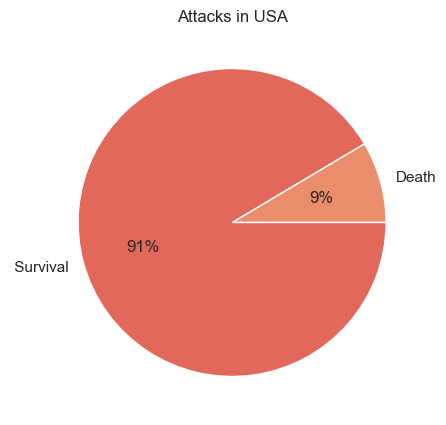

In [13]:
plotUSA= plt.pie (USA, labels = ['Death', ' Survival'], autopct='%.0f%%')
sns.set_palette ('flare')
plt.title('Attacks in USA');

En USA hay más ataques de tiburones que en Australia. Sin embargo, la tasa de mortalidad por ataques de tiburón en Australia es mucho más elevada que en USA. En Australia tenemos un porcentaje de 23% de muertos, mientras que en USA tenemos un 9%.

## Hipótesis 2: ¿En que estación del año hay más riesgo de sufrir un ataque de tiburón en estos dos países? 

In [14]:
df_season = df1.groupby(["country",'season','fatal']).agg({"fatal":"count"}).unstack()
df_season
df_deaths = df1[df1['fatal'] == 'Y']

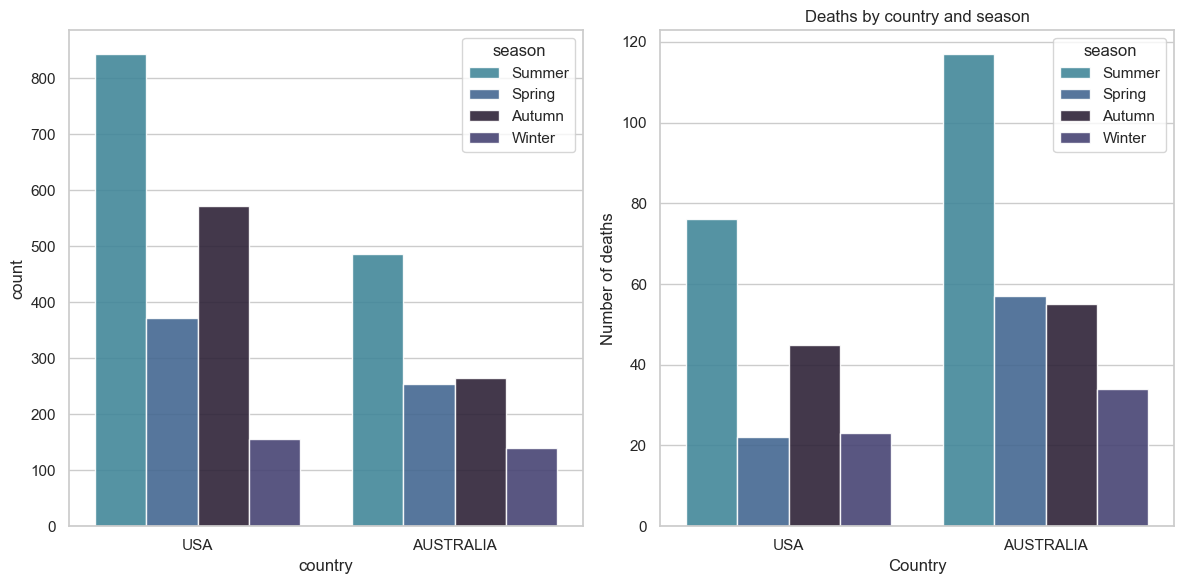

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6));

#color_dict para que los colores de las leyendas sean los mismos, dos listas para ordenar xlabels y legendlabels
color_dict = {'Autumn':sns.color_palette('mako')[0],'Winter':sns.color_palette('mako')[1],'Spring':sns.color_palette('mako')[2],'Summer': sns.color_palette('mako')[3]}
legend_order = ['Summer','Spring', 'Autumn','Winter']
x_order = ['USA','AUSTRALIA']


sns.countplot (data = df1, x = 'country', hue = 'season', order = x_order, hue_order = legend_order, palette = color_dict , alpha = 0.9, ax = axs[0]);
plt.xlabel('Country');
plt.ylabel('Number of attacks');
plt.title('Attacks by country and season');


sns.countplot (data = df_deaths, x = 'country',order = x_order, hue = 'season', hue_order = legend_order, palette = color_dict, alpha = 0.9, ax = axs[1]);
plt.xlabel('Country');
plt.ylabel('Number of deaths');
plt.title('Deaths by country and season');

fig.tight_layout()

##### ATAQUES DE TIBURON vs  MUERTES SEGÚN ESTACIÓN

En ambos países la estación del año donde se producen más ataques por tiburones es verano y la que menos ataques es invierno. Sin embargo, en Australia hay muy poca diferencia entre los ataques en otoño y primavera, mientras que en USA se producen más ataques en otoño que en primavera.

Si nos fijamos en el número de muertes por estación del año, observamos que verano continua siendo la época más peligrosa para ambos países y invierno la menos peligrosa. En USA hay más muertes en otoño que en primavera, igual que en el número de ataques. En Australia,las muertes en otoño y primavera son parecidas, pero se observa que hay más en primavera que otoño, mientras que en ataques es lo contrario. Al ser my pequeña la diferencia, no lo tomaremos como relevante

## Hipótesis 3: ¿Cuál es son las actividades con las que se producen más muertes?

1. Dropeamos todos los nan values de la columna actividades para poder realizar el análisis

In [16]:
df2 = df_deaths.copy()
df2.dropna (subset='activity', inplace = True)
df2

,case_number,year,country,activity,sex,fatal,fatal_numerica,month,latitude,hemisphere,season
133,2017.04.17,2017.0,AUSTRALIA,surfing,F,Y,1,4,-25.274398,South,Autumn
234,2016.06.05,2016.0,AUSTRALIA,diving,F,Y,1,6,-25.274398,South,Winter
237,2016.05.31,2016.0,AUSTRALIA,surfing,M,Y,1,5,-25.274398,South,Autumn
333,2015.07.25,2015.0,AUSTRALIA,diving,M,Y,1,7,-25.274398,South,Winter
370,2015.04.29,2015.0,USA,snorkeling,F,Y,1,4,37.090240,North,Spring
...,...,...,...,...,...,...,...,...,...,...,...
4523,1817.06.24,1817.0,USA,swimming,M,Y,1,6,37.090240,North,Summer
4527,1816.09.03,1816.0,USA,swimming,M,Y,1,9,37.090240,North,Autumn
4543,1780.08.08,1780.0,USA,swimming,M,Y,1,8,37.090240,North,Summer
4544,1771.07.12,1771.0,USA,fishing,M,Y,1,7,37.090240,North,Summer


In [17]:
activities = pd.crosstab(df2['country'], df2['activity'], df2['fatal'], aggfunc = 'count')
activities

activity,boarding,diving,fishing,kayaking,sailing,snorkeling,spearfishing,surfing,swimming,windsurfing
country,,,,,,,,,,
AUSTRALIA,3.0,36.0,7.0,NaN,1.0,2.0,6.0,17.0,73.0,2.0
USA,4.0,9.0,14.0,1.0,NaN,4.0,2.0,7.0,55.0,NaN


Text(0.5, 1.0, 'Deaths by activity ')

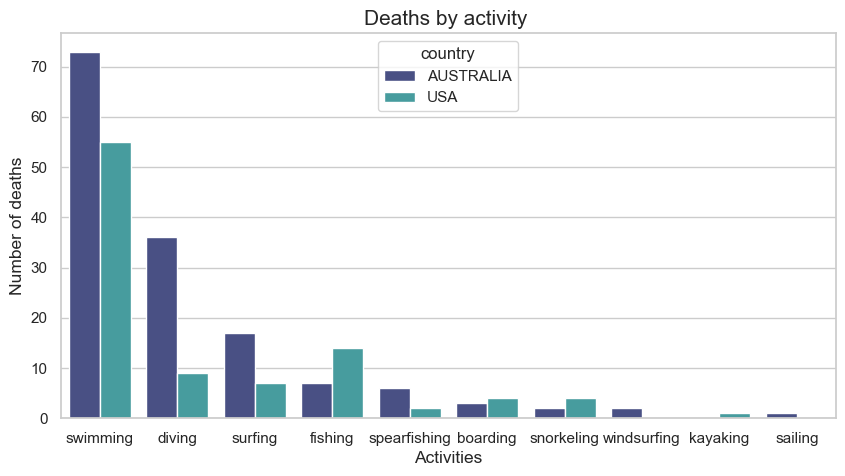

In [18]:
sns.countplot(data=df2, x='activity',palette ='mako', hue ='country', order=df2['activity'].value_counts().index) #ordre
plt.xlabel("Activities", fontsize=12.5)
plt.ylabel("Number of deaths", fontsize=12.5)
plt.title("Deaths by activity ", fontsize = 15)
#plt.tick_params(axis='both', which='major', labelsize=9.5)

Las  4 actividades con las que más personas han muerto por ataques de tiburón son nadar, submarinismo, surfear y pescar. Mientras que en USA, las actividades que conllevan más riesgo de muerte por un ataque de un tiburón son nadar, pescar y hacer submarinismo. Se puede determinar que en USA hay más riesgo de morir atacado por un tiburón si estás pescando que en Australia.

## Hipótesis 4: ¿En estos países mueren más mujeres o hombres?

In [19]:
df3 = df_deaths.copy()
df3.dropna (subset='sex', inplace = True)
df3

,case_number,year,country,activity,sex,fatal,fatal_numerica,month,latitude,hemisphere,season
133,2017.04.17,2017.0,AUSTRALIA,surfing,F,Y,1,4,-25.274398,South,Autumn
234,2016.06.05,2016.0,AUSTRALIA,diving,F,Y,1,6,-25.274398,South,Winter
237,2016.05.31,2016.0,AUSTRALIA,surfing,M,Y,1,5,-25.274398,South,Autumn
333,2015.07.25,2015.0,AUSTRALIA,diving,M,Y,1,7,-25.274398,South,Winter
370,2015.04.29,2015.0,USA,snorkeling,F,Y,1,4,37.090240,North,Spring
...,...,...,...,...,...,...,...,...,...,...,...
4527,1816.09.03,1816.0,USA,swimming,M,Y,1,9,37.090240,North,Autumn
4529,1810.09.15,1810.0,USA,NaN,M,Y,1,9,37.090240,North,Autumn
4543,1780.08.08,1780.0,USA,swimming,M,Y,1,8,37.090240,North,Summer
4544,1771.07.12,1771.0,USA,fishing,M,Y,1,7,37.090240,North,Summer


Text(0.5, 1.0, 'Deaths by sex')

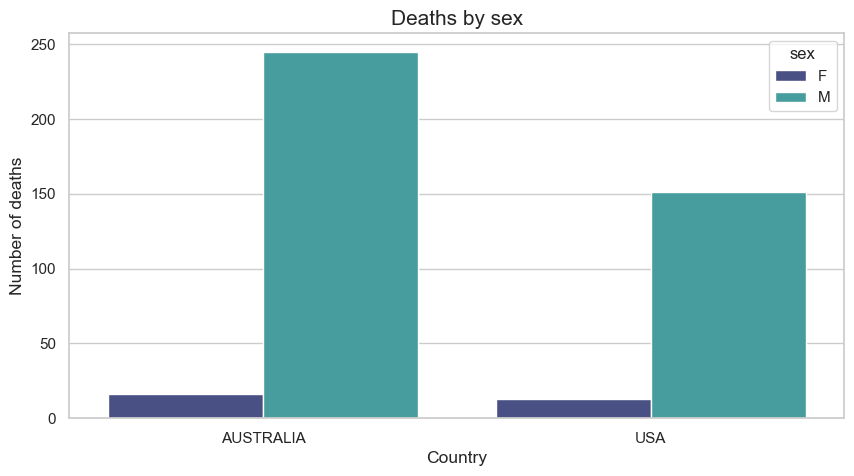

In [20]:
sns.countplot(data=df3, x='country',palette ='mako', hue ='sex') #ordre
plt.xlabel("Country", fontsize=12.5)
plt.ylabel("Number of deaths", fontsize=12.5)
plt.title("Deaths by sex", fontsize = 15)
#plt.tick_params(axis='both', which='major', labelsize=9.5)

En ambos países mueren más hombres que mujeres, no hay distinción entre países.